#Feature Visualization using Forward pass Hook


In [1]:
from google.colab import files, drive

#uploaded = files.upload()
drive.mount('/content/drive/', force_remount=True)

#! pip install albumentations==0.4.6

Mounted at /content/drive/


In [2]:
import torch
import torchvision.models
import torch.nn.functional as F
import torch.nn as nn

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt


##Load Model

In [3]:
model = torch.hub.load('pytorch/vision:v0.6.0', 'vgg19', pretrained=True)
fhooks = []
for i,l in enumerate(list(model._modules.keys())):
    print(i,l)
    #print(getattr(model,l))

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


0 features
1 avgpool
2 classifier


##Create Hook

In [4]:
class SaveOutput:
    def __init__(self):
        self.outputs = []
        
    def __call__(self, module, module_in, module_out):
        self.outputs.append(module_out)
        
    def clear(self):
        self.outputs = []

In [5]:
save_output = SaveOutput()

hook_handles = []

#take output for all the conv2d layers
for layer in model.modules():
    if isinstance(layer, torch.nn.modules.conv.Conv2d):
        handle = layer.register_forward_hook(save_output)
        hook_handles.append(handle)

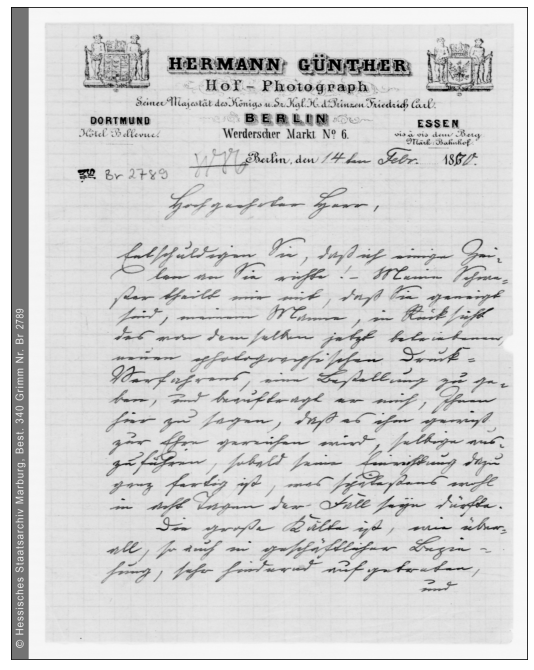

In [6]:
from PIL import Image
from torchvision import transforms as T

image = Image.open('/content/drive/My Drive/Master_Thesis/Database/cBAD_dataset/train/cPAS-0021.jpg')
plt.figure(figsize=(12, 12), frameon=False)
plt.imshow(image)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

transform = T.Compose([T.Resize((224, 224)), T.ToTensor()])
X = transform(image).unsqueeze(dim=0)

out = model(X)

In [7]:
for i in range(len(save_output.outputs)):
    print(save_output.outputs[i].detach().numpy().shape)

(1, 64, 224, 224)
(1, 64, 224, 224)
(1, 128, 112, 112)
(1, 128, 112, 112)
(1, 256, 56, 56)
(1, 256, 56, 56)
(1, 256, 56, 56)
(1, 256, 56, 56)
(1, 512, 28, 28)
(1, 512, 28, 28)
(1, 512, 28, 28)
(1, 512, 28, 28)
(1, 512, 14, 14)
(1, 512, 14, 14)
(1, 512, 14, 14)
(1, 512, 14, 14)


#Print the output

In [8]:
import matplotlib.pyplot as plt

for i in range(len(save_output.outputs)):
    images = save_output.outputs[i].detach().to('cpu').numpy() 

    with plt.style.context("seaborn-white"):
        plt.figure(figsize=(10, 10), frameon=False)
        for idx in range(64):
            plt.subplot(8, 8, idx+1)
            plt.imshow(images[0, idx])
        plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

Output hidden; open in https://colab.research.google.com to view.